In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### EXERCISE 1
The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [4]:
#first of all let's see our hypothesis.

#h0 : h0 >= 13.20
#h1 : h1 < 13.20

mu = 13.20
x_bar = 12.20
n = 40
sigma = 2.50
alpha = 0.01

#we can use z-test in this case.

z = (12.20 - 13.20) / (sigma/np.sqrt(n))
z

-2.5298221281347035

In [7]:
#now we will found p_value

p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [8]:
if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


As above outputs show us, we can accuse of the company for paying substandard wages.

#### EXERCISE 2
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06;

In [15]:
df = pd.read_csv("soil - Sheet1.csv")
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Soil1,30.0,1.691800,0.206903,1.110,1.572,1.675,1.86525,2.054
Soil2,35.0,1.417114,0.219184,1.053,1.231,1.379,1.55900,1.878


In [34]:
# H0 : mu1 = mu2
# H1 : mu1 != mu2 

#There are two different soil types, so independent sample test can be used. 

indTest = stats.ttest_ind(df["Soil1"], df["Soil2"], nan_policy = "omit")
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

As p_value shows us it is lower than alpha (0.01%), h0 is rejected.

#### EXERCISE 3
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [35]:
df2 = pd.read_csv("2015 PISA Test - Sheet1.csv")
df2.head(1)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.157,405.2588,427.225


In [36]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [39]:
df2.columns[2:]

Index(['internet_users_per_100', 'Math', 'Reading', 'Science'], dtype='object')

In [53]:
df2.groupby("Continent_Code")[df2.columns[2:]].agg(["std", "mean", "median", stats.mode])

internet_users_per_100                        \
                                  std       mean     median   
Continent_Code                                                
AF                           7.297226  43.359918  43.359918   
AS                          21.086060  68.455613  74.000000   
EU                          12.425773  77.274888  76.184000   
OC                           2.589686  86.391704  86.391704   
SA                           9.772455  60.180494  64.289000   

                                           Math                         \
                                mode        std        mean     median   
Continent_Code                                                           
AF                     ([38.2], [1])   5.099513  363.212100  363.21210   
AS              ([21.97606771], [1])  64.356490  466.216647  459.81600   
EU              ([53.74497914], [1])  35.150403  477.981449  489.72870   
OC              ([84.56051935], [1])   0.938401  494.559750  494.55975   
SA                     ([40.9], [1])  18.128894  402.887700  409.03330   

                                     Reading                         \
                             mode        std        mean     median   
Continent_Code                                                        
AF              ([359.6062], [1])   7.916909  355.457400  355.45740   
AS               ([380.259], [1])  57.048962  454.059682  433.54230   
EU              ([371.3114], [1])  37.720545  476.164608  487.25010   
OC              ([493.8962], [1])   4.504341  506.085650  506.08565   
SA              ([377.0695], [1])  19.709688  425.359229  425.30310   

                                     Science                         \
                             mode        std        mean     median   
Continent_Code                                                        
AF              ([349.8593], [1])   7.536556  381.074250  381.07425   
AS               ([346.549], [1])  56.671371  467.945847  456.48360   
EU              ([351.7415], [1])  34.450616  478.299381  490.22500   
OC              ([502.9006], [1])   2.340241  511.648700  511.64870   
SA              ([397.5414], [1])  18.470319  421.747186  424.59050   

                                   
                             mode  
Continent_Code                     
AF              ([375.7451], [1])  
AS              ([386.4854], [1])  
EU              ([383.6824], [1])  
OC              ([509.9939], [1])  
SA              ([396.6836], [1])

In [109]:
#h0 : EU_mu = AS_mu
#h1 : EU_mu != AS_mu

In [135]:
df2[(df2["Continent_Code"] == "AS") | (df2["Continent_Code"] == "EU" )].groupby("Continent_Code")["Math"].mean()

Continent_Code
AS    466.216647
EU    477.981449
Name: Math, dtype: float64

In [136]:
indTest = stats.ttest_ind(df2.loc[df2['Continent_Code'] == 'EU','Math'], df2.loc[df2['Continent_Code'] == 'AS','Math'])
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [108]:
alpha = 0.05

if indTest.pvalue< alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.


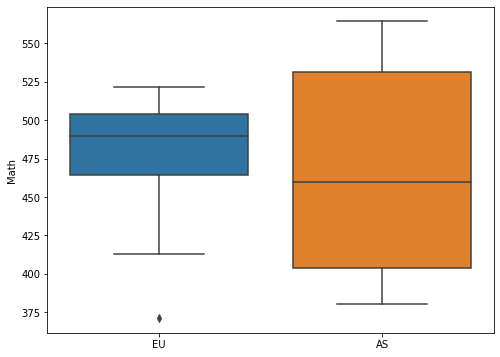

In [152]:
plt.figure(figsize=(8,6))
math_plot = [df2.loc[df2['Continent_Code'] == 'EU','Math'], df2.loc[df2['Continent_Code'] == 'AS','Math']]
sns.boxplot(data=math_plot)
plt.xticks(ticks=[0,1],labels=['EU', 'AS'])
plt.ylabel('Math');

#### EXERCISE 4
 A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.  Weight Dataset

CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

In [144]:
df3 = pd.read_excel("weight.xlsx")

In [145]:
df3

,ID,starting,ending
0,1,76,72
1,2,81,82
2,3,86,84
3,4,71,71
4,5,88,83
5,6,78,74
6,7,76,70
7,8,81,80
8,9,79,78
9,10,77,79


In [157]:
df3["Difference"] = df3.starting - df3.ending
df3

,ID,starting,ending,Difference
0,1,76,72,4
1,2,81,82,-1
2,3,86,84,2
3,4,71,71,0
4,5,88,83,5
5,6,78,74,4
6,7,76,70,6
7,8,81,80,1
8,9,79,78,1
9,10,77,79,-2


In [158]:
df3.Difference.mean()

1.6666666666666667

In [155]:
#this is a relational test required exercise because there are pre and post weight results to check.
#h0 : difference = 0
#h1 : difference > 0

relTest = stats.ttest_rel(df3.starting, df3.ending, alternative = "greater")
relTest

Ttest_relResult(statistic=2.6780834840499255, pvalue=0.00900646517506626)

In [156]:
alpha = 0.01

if relTest.pvalue < alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


So we can say that the h0 is rejected and the exercise and diet program have an impact on customers' weight loss.